# Introduction
Research suggests that speech production can be modeled as a nonlinear dynamical system, wherein small perturbations in the interaction of its parts give rise to chaotic yet deterministic behavior. Parkinson's-related impairments (e.g. tremors, etc.) to the vocal organs, muscles and nerves can affect dynamics of the entire system, suggesting that nonlinear measures  may benefit the prediction of disease stage from voice recordings. 

## Features
### Traditional measures:
  * **age**
  * **sex**
  * **shimmer** - extent of variation in amplitude from vocal cycle to vocal cycle
  * **noise-to-harmonics ratio (NHR)** -  amplitude of noise relative to tonal components of speech signal
  * **jitter** - measures pitch variation, such as vibrato and microtremor; calculated as differences in absolute frequencies of each cycle, averaged over a number of cycles
      - *Note*: Natural pitch variation exists in healthy individuals, but may be perturbed in those with vocal impairments secondary to Parkinson's. 
  
### Complex dynamical systems-based measures:

  * **correlation dimension** - used to recreate all possible states (phase space) of the system that generates speech  
  * **recurrence period density entropy (RPDE)** - this entropy measures the periodicity of the system
      - When the signal deviates from its trajectory of recurring to the same point in the phase space, this may indicate a voice disorder. Many voice disorders impair the patient's ability to sustain vocal fold vibration, which can be measured as in terms of aperiodicity.  
    
  * **detrended fluctuation analysis (DFA)** - extent of stochastic self-similarity of noise in the speech signal
      - Air blowing over vocal folds is a major cause of noise in speech, the pattern of which may be disrupted in some voice disorders. This noise can be characterized by a scaling exponent, which is higher in those with vocal disorders.  
      
  * **pitch period entropy (PPE)** - this entropy provides another measure of pitch variation (compare to **jitter**)
      - Because pitch is produced and perceived on a logarithmic scale, PPE is calculated first by converting a pitch sequence to the logarithmic semitone scale. A filter then removes natural pitch variations (such as those due to gender and individual differences), and a probability distribution of voice variations is constructed. Finally, entropy is calculated, characterizing the extent of variation beyond natural fluctuations in pitch. Increased PPE may suggest speech variations beyond those seen in healthy speech production.
      
### Target feature:

We will predict total scores on the [Unified Parkinson's disease rating scale (UPDRS)](https://neurosurgery.mgh.harvard.edu/functional/pdstages.htm), the scale most commonly used to study the long-term course of the disease. 

# Setting Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings 
import datetime
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set()
pd.options.display.max_columns=None

In [2]:
data_path = '../Data/'
df = pd.read_csv(data_path+"data.csv")

# Exploratory Data Analysis

## Descriptive statistics and data cleaning

In [3]:
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
subject#         5875 non-null int64
age              5875 non-null int64
sex              5875 non-null int64
test_time        5875 non-null float64
motor_UPDRS      5875 non-null float64
total_UPDRS      5875 non-null float64
Jitter(%)        5875 non-null float64
Jitter(Abs)      5875 non-null float64
Jitter:RAP       5875 non-null float64
Jitter:PPQ5      5875 non-null float64
Jitter:DDP       5875 non-null float64
Shimmer          5875 non-null float64
Shimmer(dB)      5875 non-null float64
Shimmer:APQ3     5875 non-null float64
Shimmer:APQ5     5875 non-null float64
Shimmer:APQ11    5875 non-null float64
Shimmer:DDA      5875 non-null float64
NHR              5875 non-null float64
HNR              5875 non-null float64
RPDE             5875 non-null float64
DFA              5875 non-null float64
PPE              5875 non-null float64
dtypes: float64(19), int64(3)
memory usag

In [5]:
df.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [6]:
def gender(val):
    if val == 1:
        return "F"
    return "M"
df.sex = df.sex.apply(gender)
df.age = df.age.astype("int")
df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,M,5.64310,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.160060
1,1,72,M,12.66600,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.108100
2,1,72,M,19.68100,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.210140
3,1,72,M,25.64700,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.332770
4,1,72,M,33.64200,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.193610
5,1,72,M,40.65200,29.435,36.870,0.00353,0.000023,0.00119,0.00159,0.00357,0.02227,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.195000
6,1,72,M,47.64900,29.682,37.363,0.00422,0.000024,0.00212,0.00221,0.00637,0.04352,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.175630
7,1,72,M,54.64000,29.928,37.857,0.00476,0.000025,0.00226,0.00259,0.00678,0.02191,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.238440
8,1,72,M,61.66900,30.177,38.353,0.00432,0.000029,0.00156,0.00207,0.00468,0.04296,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.200370
9,1,72,M,68.68800,30.424,38.849,0.00496,0.000027,0.00258,0.00253,0.00773,0.03610,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.201170


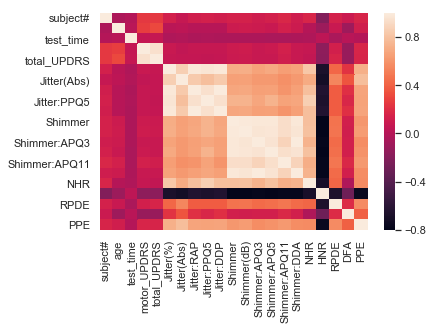

In [7]:
corr = df.corr()
sns.heatmap(corr)

Since we were unable to extract certain vocal features, we had to drop several columns and make do with what can extract.

Apart from vocal features, we drop test time and subject id, because we cannot use this

In [8]:
columns_to_drop = ["subject#","test_time"] + ["NHR","HNR","RPDE","DFA","PPE","Jitter(%)"]
df_new = df.drop(columns=columns_to_drop)
df_new

,age,sex,motor_UPDRS,total_UPDRS,Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA
0,72,M,28.199,34.398,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314
1,72,M,28.447,34.894,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982
2,72,M,28.695,35.389,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202
3,72,M,28.905,35.810,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317
4,72,M,29.187,36.375,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036
5,72,M,29.435,36.870,0.000023,0.00119,0.00159,0.00357,0.02227,0.214,0.01006,0.01337,0.02263,0.03019
6,72,M,29.682,37.363,0.000024,0.00212,0.00221,0.00637,0.04352,0.445,0.02376,0.02621,0.03488,0.07128
7,72,M,29.928,37.857,0.000025,0.00226,0.00259,0.00678,0.02191,0.212,0.00979,0.01462,0.01911,0.02937
8,72,M,30.177,38.353,0.000029,0.00156,0.00207,0.00468,0.04296,0.371,0.01774,0.02134,0.03451,0.05323
9,72,M,30.424,38.849,0.000027,0.00258,0.00253,0.00773,0.03610,0.310,0.02030,0.01970,0.02569,0.06089


In [9]:
df_new.sex.value_counts()

M    4008
F    1867
Name: sex, dtype: int64

### UPDRS Scores
Below we can see marked differences in the distributions of UPDRS scores between men and women. 
  
The distribution of female scores shows the majority are clustered around the mean, with wide tails in both directions. The distribution of male scores is--interestingly enough--pear-shaped (or more specifically, pear-shaped with dual top and bottom stems, shorter and much narrower than those seen in the female UPDRS distribution). Though the male UPDRS average is close to that of the female group, broader quartiles suggest much greater variability in the course of disease for males compared to women. 

[Text(0,0,'Male'), Text(0,0,'Female')]

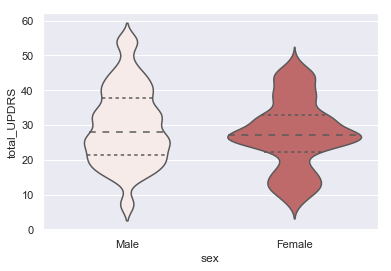

In [10]:
ax = sns.violinplot(x="sex", y="total_UPDRS",  bw=.2, palette={"M": "#f9e9e8", "F": "#CD5C5C"}, inner="quartile", data=df_new)
ax.set_xticklabels(['Male', 'Female'])

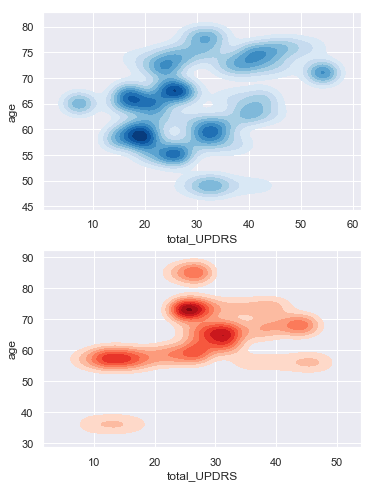

In [11]:
maledf = df_new[df_new.sex=="M"]
femaledf = df_new[df_new.sex=="F"]
f, (ax1, ax2) = plt.subplots(2)
sns.kdeplot(maledf["total_UPDRS"], maledf['age'],
                cmap="Blues", shade=True, shade_lowest=False, ax=ax1)
sns.kdeplot(femaledf["total_UPDRS"], femaledf['age'],
                 cmap="Reds", shade=True, shade_lowest=False, ax=ax2)
f.set_size_inches(5.7, 8)

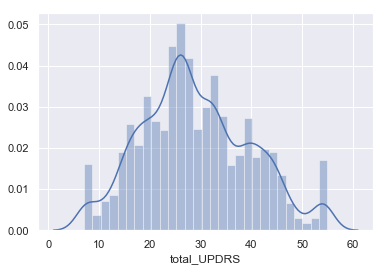

In [12]:
sns.distplot(df_new["total_UPDRS"])

In [13]:
cols = df_new.drop(columns = ["total_UPDRS", "motor_UPDRS","sex","age"]).columns
a = cols[::2]
b = cols[1::2]

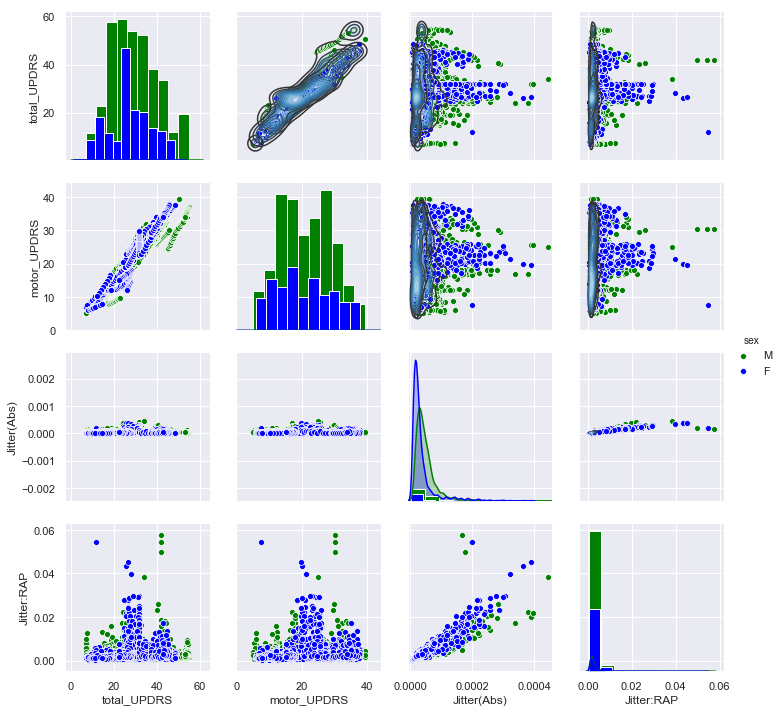

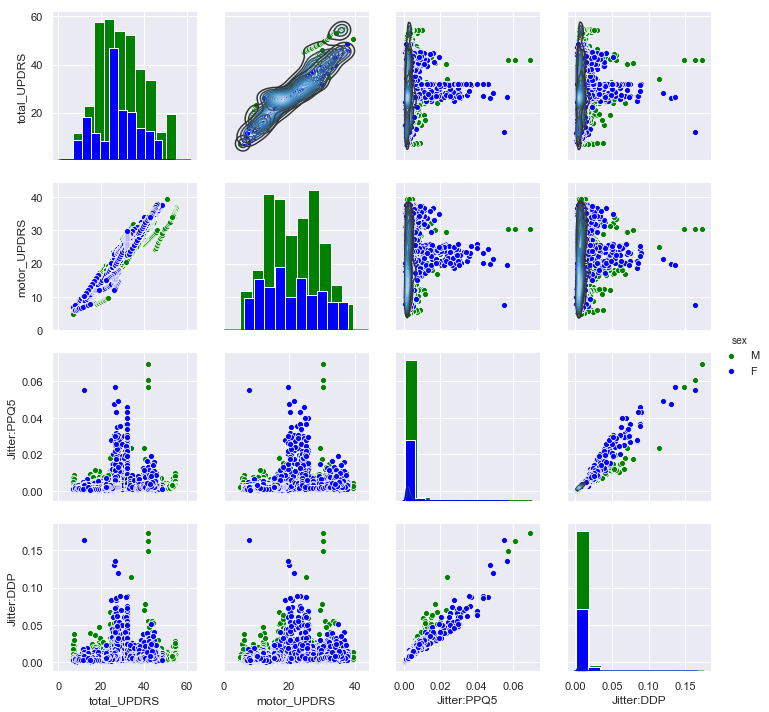

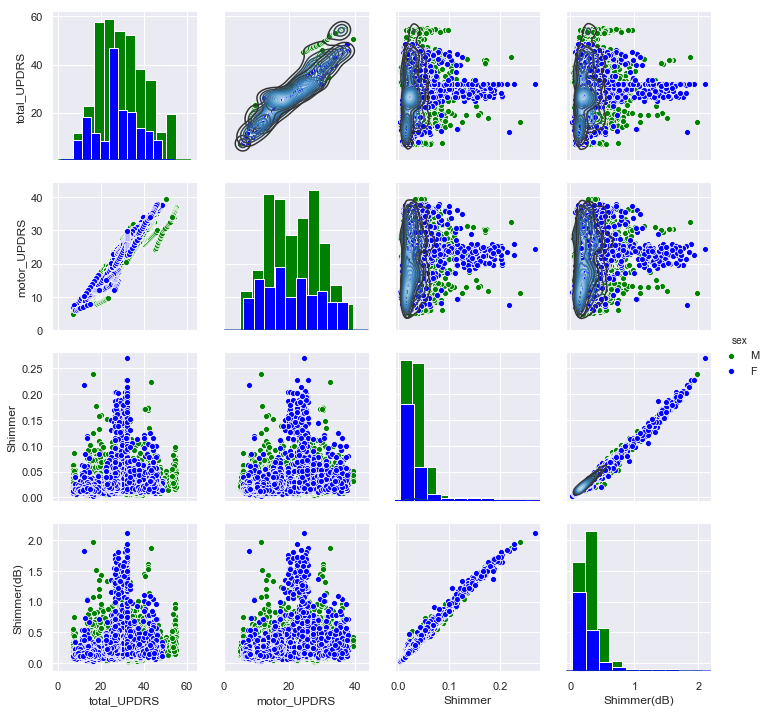

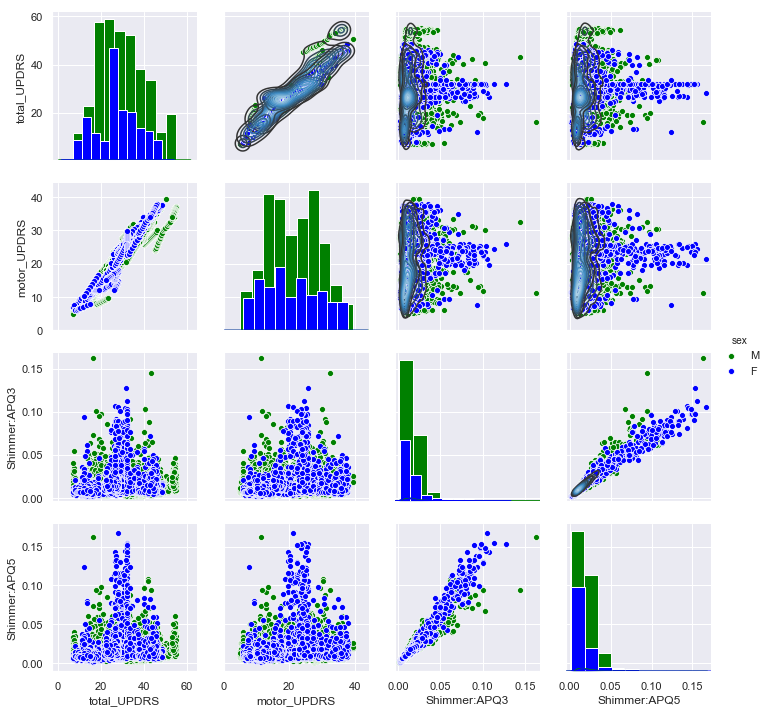

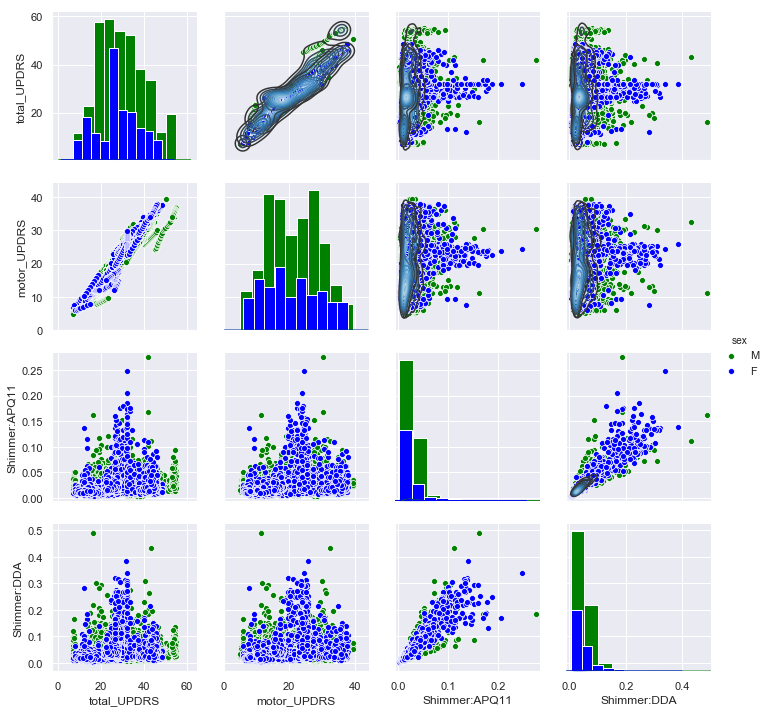

In [18]:
for x,y in zip(a,b):
    g = sns.pairplot(df_new, vars=["total_UPDRS", "motor_UPDRS"]+[x,y], hue="sex",palette={"M": "green", "F": "blue"})
    #g = sns.pairplot(df_new, vars=df_new.drop(columns='sex').columns, hue="sex")
    g.map_diag(plt.hist)
    g.map_lower(sns.scatterplot, cmap="Blues_d")
    g.map_upper(sns.kdeplot, cmap="Blues_d")
    #g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);
    plt.show()

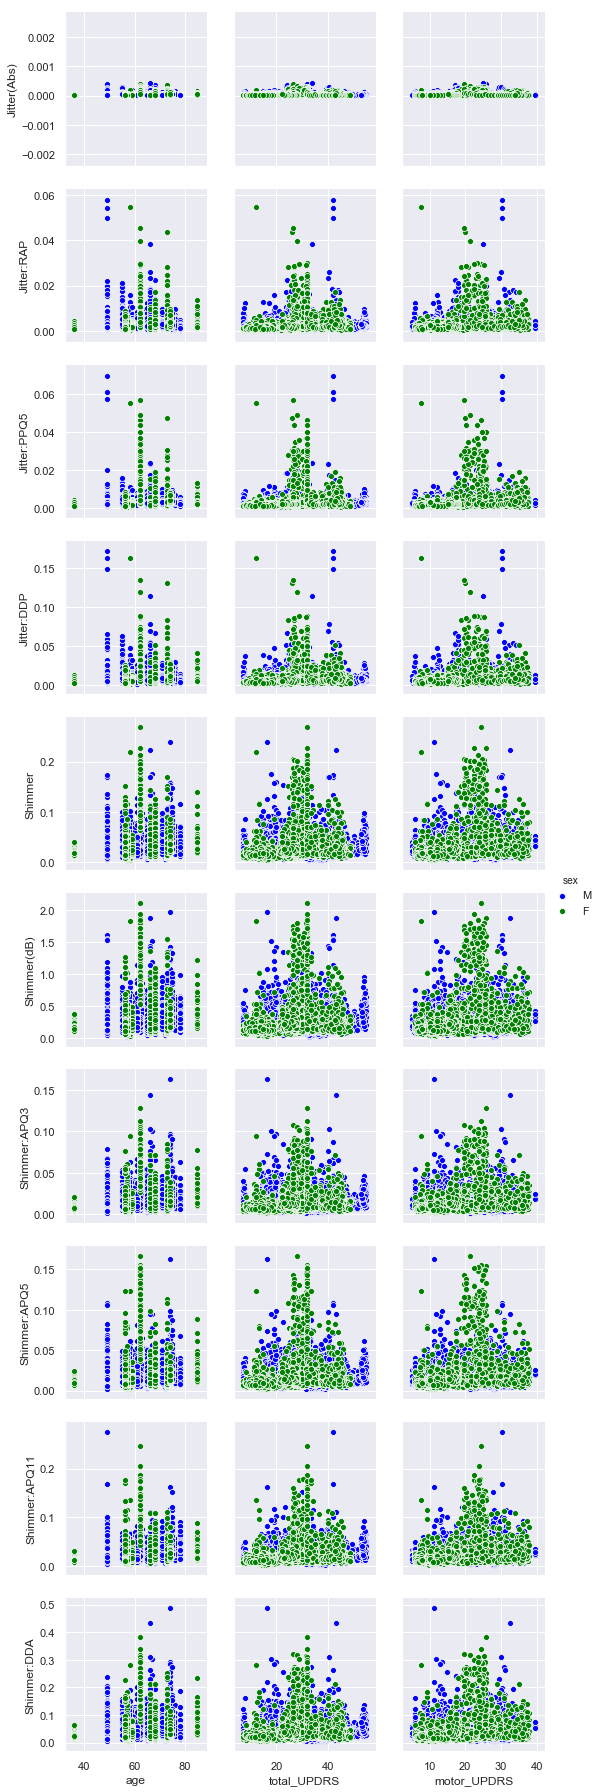

In [15]:
g = sns.pairplot(palette={"M":"blue","F":"green"},hue="sex",diag_kind='kde',data = df_new,x_vars=['age','total_UPDRS','motor_UPDRS'],y_vars=df_new.drop(columns = ['age','total_UPDRS','motor_UPDRS','sex']).columns)
plt.show()

We see that most individuals' scores increase steadily over time in the study, though several subjects maintain or even drastically decrease their scores over the course of the study. 

# Statistical analysis

## Continuous variable comparisions using the pearson correlation test

In [16]:
def pearson_wrapper(df,target,columns=None,verbose=False,alpha=0.05):
    '''Function performs the pearson correlation test of all the columns with the target variable.
    The anova test tests the null hypothesis that the population median of all of the groups are equal.
    
    Parameters
    ----------
    df -> The pandas dataframe
    target -> The target variable you want to test for
    columns -> the specific list of columns you want test. All if not specified.
    '''
    if columns == None:
        columns = [x for x in df.columns if df[x].dtype!='object']
    assert df[target].dtype=='float',"This function can only be used with a quantative target variable"
    for column in columns:
        assert df[column].dtype != 'object',"This function is intended for quantative indipendent variables"
    useful_columns = []
    for column in columns:
            if column == target:
                continue
            print("For "+column+" :-")
            res = scipy.stats.pearsonr(df[column],df[target])
            if verbose:
                print(res)
            if res[1] < alpha :
                print("Reject null hypothesis\n----------------")
                useful_columns.append(column)
            else:
                print("Accept null hypothesis\n----------------")
    print("According to the test, the useful columns are :-\n"+", ".join(useful_columns))

In [17]:
pearson_wrapper(df_new.drop(columns = ["motor_UPDRS"]),"total_UPDRS")

For age :-
Reject null hypothesis
----------------
For Jitter(Abs) :-
Reject null hypothesis
----------------
For Jitter:RAP :-
Reject null hypothesis
----------------
For Jitter:PPQ5 :-
Reject null hypothesis
----------------
For Jitter:DDP :-
Reject null hypothesis
----------------
For Shimmer :-
Reject null hypothesis
----------------
For Shimmer(dB) :-
Reject null hypothesis
----------------
For Shimmer:APQ3 :-
Reject null hypothesis
----------------
For Shimmer:APQ5 :-
Reject null hypothesis
----------------
For Shimmer:APQ11 :-
Reject null hypothesis
----------------
For Shimmer:DDA :-
Reject null hypothesis
----------------
According to the test, the useful columns are :-
age, Jitter(Abs), Jitter:RAP, Jitter:PPQ5, Jitter:DDP, Shimmer, Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, Shimmer:APQ11, Shimmer:DDA


## Categorical variables and UPDRS comparisions

Let's check if the UDPRS scores are normally distributed

In [18]:
scipy.stats.normaltest(df_new["total_UPDRS"])

NormaltestResult(statistic=115.7591182452, pvalue=7.298386492105016e-26)

Normal test results can be understood as follows:-

null hypothesis : x comes from a normal distribution

alternate hypothesis : x doesnot come from a normal distribution

According to test, p value was very less, hence we reject the null hypothesis that total updrs is normally distributed. Hence we perform the non parametric test for age

In [19]:
def kruskal_wallis_wrapper(df,target,columns=None,verbose=False,alpha=0.05):
    '''Function performs the Kruskal-Wallis H-test of all the columns with the target variable.
    The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA.
    
    Parameters
    ----------
    df -> The pandas dataframe
    target -> The target variable you want to test for
    columns -> the specific list of columns you want test. All if not specified.
    '''
    if columns == None:
        columns = [x for x in df.columns if df[x].dtype=='object']
    assert df[target].dtype=='float',"This function can only be used with a quantative target variable"
    for column in columns:
        assert df[column].dtype == 'object',"This function is intended for categorical indipendent variables"
    useful_columns = []
    for column in columns:
            print("For "+column+" :-")
            groups = df.groupby(column)
            data = [groups.get_group(x)[target] for x in groups.groups]
            res = scipy.stats.kruskal(*data)
            if verbose:
                print(res)
            if res.pvalue < alpha :
                print("Reject null hypothesis\n----------------")
                useful_columns.append(column)
            else:
                print("Accept null hypothesis\n----------------")
    print("According to the test, the useful columns are :-\n"+",".join(useful_columns))

In [20]:
kruskal_wallis_wrapper(df_new,"total_UPDRS")

For sex :-
Reject null hypothesis
----------------
According to the test, the useful columns are :-
sex


# Model Building

#### importing required modules:-

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor,VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer, Normalizer
from sklearn.decomposition import PCA
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#### First lets one hot encode all the categorical features

* In this case, only gender is the categorical features, so we one hot encode the gender

In [22]:
final_df = pd.concat((df_new,pd.get_dummies(df_new.sex)),axis=1).drop(columns = ["sex"])
final_df.head()

,age,motor_UPDRS,total_UPDRS,Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,F,M
0,72,28.199,34.398,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0,1
1,72,28.447,34.894,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0,1
2,72,28.695,35.389,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0,1
3,72,28.905,35.810,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0,1
4,72,29.187,36.375,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0,1


In [23]:
features = final_df.drop(columns =["total_UPDRS","motor_UPDRS"])
targets = final_df[["total_UPDRS","motor_UPDRS"]]
X_train,X_test,y_train,y_test = train_test_split(features,targets,random_state=2,test_size=0.3)
print("Number of features considered :-", len(features.columns))

Number of features considered :- 13


## Now that the features are ready, let's start building the models

### Models considered are:-
<ol>
    <li> Linear Regression </li>
    <li> Ridge Regression </li>
    <li> Multi task Lasso </li>
    <li> Multitask elastic net </li>
    <li> LARS </li>
    <li> Kernel Ridge Regression </li>
    <li> Nearest Neighbours regression </li>
    <li> Decision Tree regression</li>
    <li> Extra trees Regressor</li>   
    <li> Neural Networks </li>
</ol>

For each of the models, we will use the grid search to find the best possible hyperparameters. It is computationally expensive but we will not miss out on any model beacuse of poor hyperparameter tuning. Let's also calculate the total time taken to train the models using this method. Time taken for individual models is also displayed. 

In [24]:
from time import time
start_time = time()

In [25]:
def create_pipe_model(model):
    '''
    Returns a pipeline with the 4 steps:-
    1)Scaling the data
    2)Feature selection or dimentionality reducion
    3)Regression
    '''
    return Pipeline([
                  ('scale',preprocessing.Normalizer()),
                  ('feature_selection', SelectFromModel(model)),
                  ('Regression', model)
                    ])
def run_model(pipe,param_dict,verbose=True,n_jobs=-1):
    clf = GridSearchCV(pipe,param_dict,verbose=verbose,n_jobs=n_jobs,error_score=0.0).fit(X_train,y_train)
    print("Training score : ",clf.score(X_train,y_train))
    print("Testing score : ",clf.score(X_test,y_test))
    print("Best params : ",clf.best_params_)
    return clf

In [26]:
clfs = {}  #stores all the models
scalers_to_test = [StandardScaler(), RobustScaler(), QuantileTransformer(),Normalizer(),None]

### Linear Regression

In [27]:
model = linear_model.LinearRegression()
feature_selection = [PCA(10),SelectFromModel(model),None]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection
}
clfs["Linear_regression"] = run_model(pipe,params)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Training score :  0.1265523321677739
Testing score :  0.12996807308743433
Best params :  {'feature_selection': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'scale': QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='uniform', random_state=None,
          subsample=100000)}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    5.9s finished


### Ridge Regression

Linear least squares with l2 regularization.

This model solves a regression model where the loss function is
the linear least squares function and regularization is given by
the l2-norm. Also known as Ridge Regression or Tikhonov regularization.

In [28]:
model = linear_model.Ridge()
feature_selection = [PCA(10),SelectFromModel(model),None]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Regression__solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}
clfs["Ridge_regression"] = run_model(pipe,params)

Fitting 3 folds for each of 105 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 300 out of 315 | elapsed:   15.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:   16.2s finished


Training score :  0.12601224036247033
Testing score :  0.1312975650927377
Best params :  {'Regression__solver': 'auto', 'feature_selection': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'scale': QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='uniform', random_state=None,
          subsample=100000)}


### Lasso Regression (Multi task)

Multi-task Lasso model trained with L1/L2 mixed-norm as regularizer

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||Y - XW||^2_Fro + alpha * ||W||_21

Where::

    ||W||_21 = \sum_i \sqrt{\sum_j w_{ij}^2}

i.e. the sum of norm of each row.

In [29]:
model = linear_model.MultiTaskLasso()
feature_selection = [PCA(10),SelectFromModel(model),None]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Regression__selection' : ['cyclic','random']
}
clfs["Lasso_regression"] = run_model(pipe,params)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s


Training score :  0.08792909994300395
Testing score :  0.088694448174486
Best params :  {'Regression__selection': 'random', 'feature_selection': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'scale': None}


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    6.6s finished


### Elastic net (Multi task)

In [30]:
model = linear_model.MultiTaskElasticNet()
feature_selection = [PCA(10),SelectFromModel(model),None]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Regression__selection' : ['cyclic','random']
}
clfs["Elasticnet"] = run_model(pipe,params)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s


Training score :  0.08801574746775528
Testing score :  0.08880259919217726
Best params :  {'Regression__selection': 'cyclic', 'feature_selection': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'scale': None}


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    6.8s finished


### Least-angle regression(LARS)
It is similar to forward stepwise regression. At each step, it finds the predictor most correlated with the response. When there are multiple predictors having equal correlation, instead of continuing along the same predictor, it proceeds in a direction equiangular between the predictors. It is suitable for high dimentional data

In [31]:
model = linear_model.Lars()
feature_selection = [PCA(10),SelectFromModel(model),None]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection
}
clfs["LARS"] = run_model(pipe,params)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Training score :  0.12655233216777367
Testing score :  0.1299680730874341
Best params :  {'feature_selection': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'scale': QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='uniform', random_state=None,
          subsample=100000)}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.3s finished


### Kernel ridge regression
Kernel ridge regression (KRR) combines ridge regression (linear least
squares with l2-norm regularization) with the kernel trick. It thus
learns a linear function in the space induced by the respective kernel and
the data. For non-linear kernels, this corresponds to a non-linear
function in the original space.

The form of the model learned by KRR is identical to support vector
regression (SVR). However, different loss functions are used: KRR uses
squared error loss while support vector regression uses epsilon-insensitive
loss, both combined with l2 regularization. In contrast to SVR, fitting a
KRR model can be done in closed-form and is typically faster for
medium-sized datasets. On the other  hand, the learned model is non-sparse
and thus slower than SVR, which learns a sparse model for epsilon > 0, at
prediction-time.


In [32]:
model = KernelRidge()
feature_selection = [PCA(10),None]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Regression__kernel' : ['linear','rbf','laplacian','sigmoid']
}
clfs["Kernel_ridge_regression"] = run_model(pipe,params,verbose=True)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.7min finished


Training score :  0.8304554879630698
Testing score :  0.8310608697115383
Best params :  {'Regression__kernel': 'laplacian', 'feature_selection': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'scale': None}


### K Nearest neighbour regression

In [33]:
model = KNeighborsRegressor()
feature_selection = [PCA(10),None]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Regression__n_neighbors' : [x for x in range(1,15,2)],
    'Regression__metric': [ 'euclidean', 'l1', 'l2','manhattan']+['braycurtis', 'canberra', 'chebyshev',
       'dice', 'hamming', 'jaccard', 'kulsinski',
      'matching', 'minkowski', 'rogerstanimoto',
      'russellrao', 'sokalmichener', 'sokalsneath'],
    'Regression__algorithm' : ['auto', 'ball_tree', 'brute','kd_tree']
}
clfs["K_nearest"] = run_model(pipe,params,n_jobs=6,verbose=True)  #Setting n_jobs as 6 so that i can continue working on my system without any lag:P

Fitting 3 folds for each of 4760 candidates, totalling 14280 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    5.5s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:    9.1s
[Parallel(n_jobs=6)]: Done 1035 tasks      | elapsed:   31.0s
[Parallel(n_jobs=6)]: Done 1522 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 1972 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 2522 tasks      | elapsed:  2.9min
[Parallel(n_jobs=6)]: Done 3172 tasks      | elapsed:  3.9min
[Parallel(n_jobs=6)]: Done 3922 tasks      | elapsed:  4.8min
[Parallel(n_jobs=6)]: Done 4772 tasks      | elapsed:  5.5min
[Parallel(n_jobs=6)]: Done 5722 tasks      | elapsed:  7.3min
[Parallel(n_jobs=6)]: Done 6772 tasks      | elapsed:  8.9min
[Parallel(n_jobs=6)]: Done 7922 tasks      | elapsed: 11.5min
[Parallel(n_jobs=6)]: Done 9172 tasks      | elapsed: 13.7min
[Parallel(n_jobs=6)]: Done 10522 tasks      | elapsed: 16.2min
[Parallel(n_jobs=6)]: Done 14280 out of 14280 | elapsed: 17.2min finished


Training score :  0.8798474330560528
Testing score :  0.8643725150741979
Best params :  {'Regression__algorithm': 'auto', 'Regression__metric': 'l1', 'Regression__n_neighbors': 13, 'feature_selection': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'scale': None}


### Decision tree regressor

In [34]:
model = DecisionTreeRegressor()
feature_selection = [PCA(10),None]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Regression__criterion' : ['mse','mae','friedman_mse'],
    'Regression__splitter' : ["best",'random'],
    'Regression__max_depth' : [x for x in range(8,20,3)]+[None],
    'Regression__max_features' : ['auto','sqrt','log2',None],
    'Regression__min_samples_split' : [x for x in range(2,10,2)],
}
clfs["Decision_tree"] = run_model(pipe,params,n_jobs=6,verbose=True)

Fitting 3 folds for each of 4800 candidates, totalling 14400 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    5.2s
[Parallel(n_jobs=6)]: Done 1358 tasks      | elapsed:   18.1s
[Parallel(n_jobs=6)]: Done 3858 tasks      | elapsed:   44.1s
[Parallel(n_jobs=6)]: Done 5219 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 5669 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 6219 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 6869 tasks      | elapsed:  5.3min
[Parallel(n_jobs=6)]: Done 7619 tasks      | elapsed:  6.6min
[Parallel(n_jobs=6)]: Done 8469 tasks      | elapsed:  8.4min
[Parallel(n_jobs=6)]: Done 9419 tasks      | elapsed: 10.5min
[Parallel(n_jobs=6)]: Done 14400 out of 14400 | elapsed: 11.9min finished


Training score :  0.9165446201868389
Testing score :  0.8700634481287054
Best params :  {'Regression__criterion': 'friedman_mse', 'Regression__max_depth': 8, 'Regression__max_features': 'auto', 'Regression__min_samples_split': 8, 'Regression__splitter': 'best', 'feature_selection': None, 'scale': QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='uniform', random_state=None,
          subsample=100000)}


### Extra trees regressor

In [36]:
model = ExtraTreesRegressor()
feature_selection = [PCA(10),SelectFromModel(model),None]
pipe = create_pipe_model(model)
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    'Regression__n_estimators' : [x for x in range(10,50,20)],
    'Regression__criterion' : ['mse','mae'],
    'Regression__max_depth' : [x for x in range(8,15,4)]+[None],
    'Regression__max_features' : ['auto','sqrt','log2',None],
    'Regression__bootstrap' : [True,False],
}
clfs["Extra_trees"] = run_model(pipe,params,n_jobs=6,verbose=True)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   15.6s
[Parallel(n_jobs=6)]: Done 323 tasks      | elapsed:   23.4s
[Parallel(n_jobs=6)]: Done 611 tasks      | elapsed:   40.0s
[Parallel(n_jobs=6)]: Done 961 tasks      | elapsed:   58.1s
[Parallel(n_jobs=6)]: Done 1411 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 1961 tasks      | elapsed:  7.4min
[Parallel(n_jobs=6)]: Done 2863 tasks      | elapsed:  9.3min
[Parallel(n_jobs=6)]: Done 3813 tasks      | elapsed: 16.7min
[Parallel(n_jobs=6)]: Done 4320 out of 4320 | elapsed: 24.7min finished


Training score :  0.98396586836192
Testing score :  0.908970902203764
Best params :  {'Regression__bootstrap': True, 'Regression__criterion': 'mae', 'Regression__max_depth': None, 'Regression__max_features': 'auto', 'Regression__n_estimators': 30, 'feature_selection': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'scale': None}


### Neural networks

In [45]:
model = MLPRegressor()
pipe = create_pipe_model(model)
feature_selection = [PCA(10),None]
'''
Try this if you have a lot of precessing power and time :P
hidden_set = [[x,y,z] for x in range(1,1000,300) for y in range(1,1000,300) for z in range(1,1000,300)]+[[x,y,z,w] for x in range(1,1000,300) for y in range(1,1000,300) for z in range(1,1000,300) for w in range(1,1000,300)]
params = {
    'scale' : scalers_to_test,
    'feature_selection' : feature_selection,
    #'Regression__learning_rate': ["constant", "invscaling", "adaptive"],
    'Regression__hidden_layer_sizes' : hidden_set,
    'Regression__activation': ["logistic", "relu", "tanh",'identity'],
    'Regression__solver' : ['lbfgs', 'sgd', 'adam']
}'''
params = {
    'scale' : [StandardScaler(),None],
    'feature_selection' : [PCA(10),None],
    'Regression__hidden_layer_sizes' : [(200,400,500),(100,100,100,100),(200,300,100,250)],
    'Regression__activation': ["logistic", "relu", "tanh",'identity'],
    #'Regression__solver' : ['lbfgs', 'sgd', 'adam']
}
clfs["Neural_network"] = run_model(pipe,params,n_jobs=6,verbose=True)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 144 out of 144 | elapsed: 11.7min finished


Training score :  0.7771772694981647
Testing score :  0.6859509301563695
Best params :  {'Regression__activation': 'relu', 'Regression__hidden_layer_sizes': (100, 100, 100, 100), 'feature_selection': PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'scale': StandardScaler(copy=True, with_mean=True, with_std=True)}


In [46]:
end_time = time()
print("Total time taken is",datetime.timedelta(seconds=end_time-start_time))

Total time taken is 6:41:52.427981


The best one so far was extra trees with a testing score of 0.9. However, neural networks might have give a better result if properly tuned. Perhaps considering an alternative such as randomised search would help in the computation front...

### Lets save all the models so we can reuse the best ones later

In [49]:
from sklearn.externals import joblib
models_path = "../Models/"
for x,y in clfs.items():
    joblib.dump(y,models_path + x +".pkl")